<a href="https://colab.research.google.com/github/dgoppenheimer/Molecular-Dynamics/blob/main/dgo_Analyzing_Proteins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

There are many reasons to examine and manipulate the `.pdb` structure files downloaded from the [RCSB database](https://www.rcsb.org/). The structure files contain more than just positional information about the atoms that make up the protein. To better understand the data contained in PDB files, see [Introduction to PDB Data](https://pdb101.rcsb.org/learn/guide-to-understanding-pdb-data/introduction) including the following left menu items:

- [Biological Assemblies](https://pdb101.rcsb.org/learn/guide-to-understanding-pdb-data/biological-assemblies)
- [Dealing with Coordinates](https://pdb101.rcsb.org/learn/guide-to-understanding-pdb-data/dealing-with-coordinates)
- [Methods for Determining Atomic Structures](https://pdb101.rcsb.org/learn/guide-to-understanding-pdb-data/methods-for-determining-structure)
- [Missing Coordinates and Biological Assemblies](https://pdb101.rcsb.org/learn/guide-to-understanding-pdb-data/missing-coordinates-and-biological-assemblies)
- [Resolution](https://pdb101.rcsb.org/learn/guide-to-understanding-pdb-data/resolution)
- [R-value and R-free](https://pdb101.rcsb.org/learn/guide-to-understanding-pdb-data/r-value-and-r-free)
- [Primary Sequences and the PDB Format](https://pdb101.rcsb.org/learn/guide-to-understanding-pdb-data/primary-sequences-and-the-pdb-format)
- [Small Molecule Ligands](https://pdb101.rcsb.org/learn/guide-to-understanding-pdb-data/small-molecule-ligands)
- [Beginner’s Guide to PDB Structures and the PDBx/mmCIF Format](https://pdb101.rcsb.org/learn/guide-to-understanding-pdb-data/beginner%E2%80%99s-guide-to-pdb-structures-and-the-pdbx-mmcif-format)

In this tutorial we will use the free, open-source, software, [MDAnalysis](https://www.mdanalysis.org/), to explore and analyze protein structure (`.pdb`) files. For more information on MDAnalysis installation and usage, visit the [MDAnalysis User Guide](https://userguide.mdanalysis.org/stable/index.html).

This tutorial is largely based on the excellent [12. Analysing proteins using python](https://github.com/bigginlab/OxCompBio/blob/master/tutorials/Python/12_ProteinAnalysis/12_ProteinAnalysis.ipynb) tutorial by the [Biggin Laboratory](https://bigginlab.web.ox.ac.uk/) at the University of Oxford.

Let's get started!

## Learning Objectives

By the end of this tutorial, you will be able to:

- Install `MDAnalysis` and related libraries in a Colab notebook.



## Installation of software

### Mount Google Drive

Be sure that you are logged into your <mark>course (not personal or UF)</mark> Google account.

- Mount your Google Drive.
- Save a copy of this notebook to your GitHub repository and name it `<LastNameFirstInitial-Protein-Structure.ipynb`, of course using *your* last name and first initial (without spaces and without the `< >` symbols).

In [ ]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

### Install Conda for Colab

See [How to install / use Conda on Google Colab](https://inside-machinelearning.com/en/how-to-install-use-conda-on-google-colab/), a guide to installing Conda when using Google Colab.

1. Check to see if conda is already installed:

You should get the error, `/bin/bash: conda: command not found`.

In [5]:
!conda --version

/bin/bash: conda: command not found


2. Install conda:

In [6]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:45
🔁 Restarting kernel...


3. Confirm that installation was successful:

You should get `conda 4.9.2`.

In [1]:
!conda --version

conda 4.9.2


We will now install the following software (technically libraries):

[MDAnalysis](https://www.mdanalysis.org/)  
[NGLView](https://github.com/nglviewer/nglview)  
[Matplotlib](https://matplotlib.org/)



### Install MDAnalysis

In [2]:
!conda install -q -y --prefix /usr/local -c conda-forge mdanalysis
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mdanalysis


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    biopython-1.79             |   py37h5e8e339_1         2.6 MB  conda-forge
    ca-certificates-2021.10.8  |       ha878542_0         139 KB  conda-forge
    certifi-2021.10.8          |   py37h89c1867_1         145 KB  conda-forge
    cftime-1.5.2               |   py37hb1e94ed_0         231 KB  conda-forge
    conda-4.11.0               |   py37h89c1867_0        16.9 MB  conda-forge
    cudatoolkit-11.1.1         |      h6406543_10        1.20 GB  conda-forge
    curl-7.78.0                |       h1ccaba5_0          94 KB
    cycler-0.11.0              |     pyhd8ed1ab_0          10 KB  conda-forge
    freetype-2.10.4            |       h0708190_1         890 KB  conda-forge
    griddataformats-0.6.0 

In [ ]:
import MDAnalysis as mda

### Install NGLView

In [ ]:
# Installing nglview using pip
!pip install -q nglview
from google.colab import output
output.enable_custom_widget_manager()

### Install Seaborn

In [3]:
!conda install seaborn

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

# All requested packages already installed.



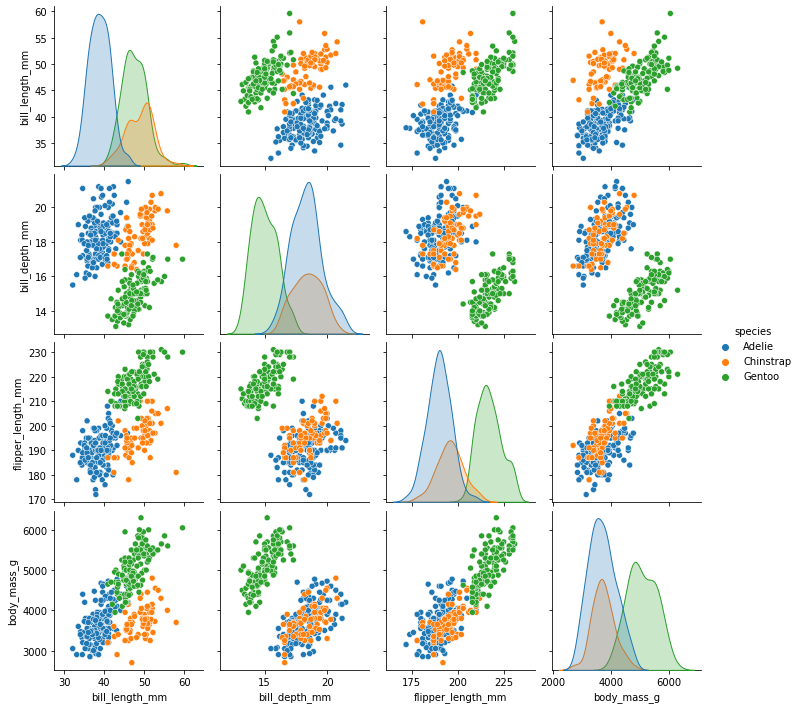

In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.show()
# just for fun
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

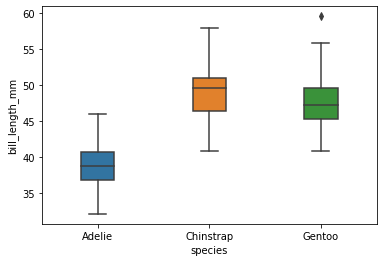

In [7]:
df = sns.load_dataset("penguins")
df.head()
sns.boxplot( x=df["species"], y=df["bill_length_mm"], width=0.3);
plt.show()

In [14]:
planets = sns.load_dataset('planets')
planets.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


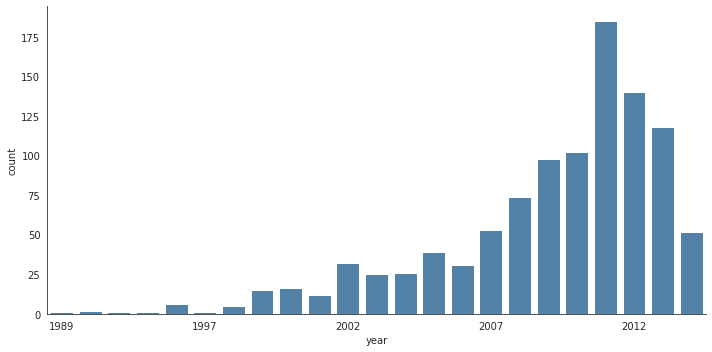

In [9]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)